## LInks
- https://www.kaggle.com/code/izzettunc/introduction-to-time-series-clustering
- https://towardsdatascience.com/hands-on-climate-time-series-clustering-using-machine-learning-with-python-6a12ce1607f9

- https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html
- https://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_wine.html
- https://scikit-learn.org/stable/modules/outlier_detection.html

In [204]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
#from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

In [92]:
import glob
import pandas as pd

def pd_read_pattern(pattern, filesNo):
    files = glob.glob(pattern)
    print(len(files))
    df = pd.DataFrame()
    fc =0
    for f in files:
        if fc >= filesNo:
            break    
        # Concat Instead of append
        df = pd.concat([df,pd.read_csv(f, low_memory=False)])
        fc += 1
        
        

    return df.reset_index(drop=True)

df = pd_read_pattern('ZTE_NBI\CallAccess_FDD_*.csv', 20)
df.info()


96
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199582 entries, 0 to 199581
Columns: 195 entries, Begin Time to Number of E-RAB(QCI7) HO Incoming Admission Request(unit)
dtypes: float64(43), int64(108), object(44)
memory usage: 296.9+ MB


In [35]:
df.describe()

,SubnetWork ID,ManagedElement ID,E-UTRAN FDD Cell ID,eNodeBId,cellId,Number of Successful Mt-Access RRC Establishment(times),Number of Mo-Data RRC Establishment Failure due to Timeout(times),Number of Mo-Signalling RRC Establishment Failure due to ENB Admission Failure(times),Number of Mo-Signalling RRC Establishment Failure due to Other Reason(times),Number of mo-VoiceCall RRC Establishment Failure due to Timeout(times),...,Number of Dedicated Cell Reselection Triggered by Centralized Load Balancing Based on the Number of UEs(times),Number of Cell DRB Admission Failure due to Not Enough CPU Resource(times),Number of Cell DRB Admission Failure due to PHY Resource Allocated Failure(times),Number of Cell Admission Failure due to Service Cell Other Parameters Modification(times),Number of Cell Admission Failure due to Target PLMN selected Failure(times),Number of Cell Admission Failure due to RRC Connection Number License Prohibit(times),Number of Cell Admission Failure due to E-RAB Number License Prohibit(times),Cell Service Time(s),Maximum Number of RRC Connection User(unit),Number of E-RAB(QCI7) HO Incoming Admission Request(unit)
count,97814.0,97814.000000,97814.000000,97814.000000,97814.000000,97814.000000,97814.000000,97814.0,97814.000000,97814.000000,...,97814.0,97814.0,97814.0,97814.0,97814.0,97814.0,97814.0,97814.000000,97814.000000,97814.000000
mean,1.0,4499.862228,27.328542,4499.862228,27.328542,43.884659,0.063467,0.0,0.000020,0.000174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,845.489020,10.002658,1.352117
std,0.0,1235.138233,5.815426,1235.138233,5.815426,57.847371,0.453269,0.0,0.004522,0.013936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.241259,10.595263,4.856328
min,1.0,1103.000000,21.000000,1103.000000,21.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.0,4026.000000,22.000000,4026.000000,22.000000,5.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.000000,3.000000,0.000000
50%,1.0,5013.000000,31.000000,5013.000000,31.000000,22.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.000000,7.000000,0.000000
75%,1.0,5031.000000,32.000000,5031.000000,32.000000,60.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.000000,13.000000,0.000000
max,1.0,9003.000000,61.000000,9003.000000,61.000000,515.000000,26.000000,0.0,1.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.000000,109.000000,105.000000


In [276]:
metrics_list = df.columns.tolist()[14:]
metrics_list[7]

import numbers
import numpy as np
#isinstance(df[m], numbers.Number),
metrics_list_fin = []
for m in metrics_list:
    #print('{} {}'.format(m,df[m].dtype))
    if df[m].dtype == np.int64 or df[m].dtype == np.float64:
        r = df[m].sum()
        if r != 0:
            metrics_list_fin.append(m)
            #print(m)
#df.info()
#metrics_list_fin

In [36]:
#df2 = pd.read_csv("ZTE_NBI\CallAccess_FDD_202301310000_202302010000.csv", low_memory=False, delimiter=',', chunksize = 100, iterator=True)
#df#.info()
#df = df2.get_chunk(1000)
#df  

In [37]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [133]:
# Granularity 15 minutes
#df.columns.tolist()[3:14]
eNodeB = df['eNodeB Name'].unique()
cellName = df['E-UTRAN\xa0FDD\xa0Cell Name'].unique()

In [145]:
print('Towers:{}, Cells:{}'.format(len(eNodeB),len(cellName)))
eNodeB

Towers:19, Cells:116


array(['PAF003', 'PAF018', 'PAF041', 'PAF033', 'LIM026', 'PAF031',
       'PAF027', 'LIM024', 'LAR057', 'PAF013', 'PAF042', 'LAB003',
       'LIM045', 'PAF024', 'NIC103', 'LIM003', 'PAF021', 'LIM090',
       'LAR058'], dtype=object)

#### Drop NA

In [238]:
#https://towardsdatascience.com/hands-on-climate-time-series-clustering-using-machine-learning-with-python-6a12ce1607f9
time_series_data = df.dropna().reset_index().drop('index',axis=1)
time_series_data['datetime'] = pd.to_datetime(time_series_data['Begin Time'])
time_series_data.head()

,Begin Time,End Time,Granularity,SubnetWork ID,SubnetWork Name,ManagedElement ID,Managed Element,eNodeB ID,eNodeB Name,E-UTRAN FDD Cell ID,...,Number of Cell DRB Admission Failure due to PHY Resource Allocated Failure(times),Number of Cell Admission Failure due to Service Cell Other Parameters Modification(times),Number of Cell Admission Failure due to Target PLMN selected Failure(times),Number of Cell Admission Failure due to RRC Connection Number License Prohibit(times),Number of Cell Admission Failure due to E-RAB Number License Prohibit(times),Cell Service Time(s),Maximum Number of RRC Connection User(unit),Number of E-RAB HO Incoming Admission Request(unit),Number of E-RAB(QCI7) HO Incoming Admission Request(unit),datetime
0,2023-01-31 00:00:00,2023-01-31 00:15:00,15 minutes,1,1(1),5003,PAF003(5003),280-20_5003,PAF003,21,...,0,0,0,0,0,900,9,16,1,2023-01-31
1,2023-01-31 00:00:00,2023-01-31 00:15:00,15 minutes,1,1(1),5003,PAF003(5003),280-20_5003,PAF003,22,...,0,0,0,0,0,900,13,14,3,2023-01-31
2,2023-01-31 00:00:00,2023-01-31 00:15:00,15 minutes,1,1(1),5003,PAF003(5003),280-20_5003,PAF003,23,...,0,0,0,0,0,900,13,52,5,2023-01-31
3,2023-01-31 00:00:00,2023-01-31 00:15:00,15 minutes,1,1(1),5003,PAF003(5003),280-20_5003,PAF003,31,...,0,0,0,0,0,900,2,1,0,2023-01-31
4,2023-01-31 00:00:00,2023-01-31 00:15:00,15 minutes,1,1(1),5003,PAF003(5003),280-20_5003,PAF003,32,...,0,0,0,0,0,900,2,18,3,2023-01-31


In [218]:
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199090 entries, 0 to 199089
Columns: 196 entries, Begin Time to datetime
dtypes: datetime64[ns](1), float64(43), int64(108), object(44)
memory usage: 297.7+ MB


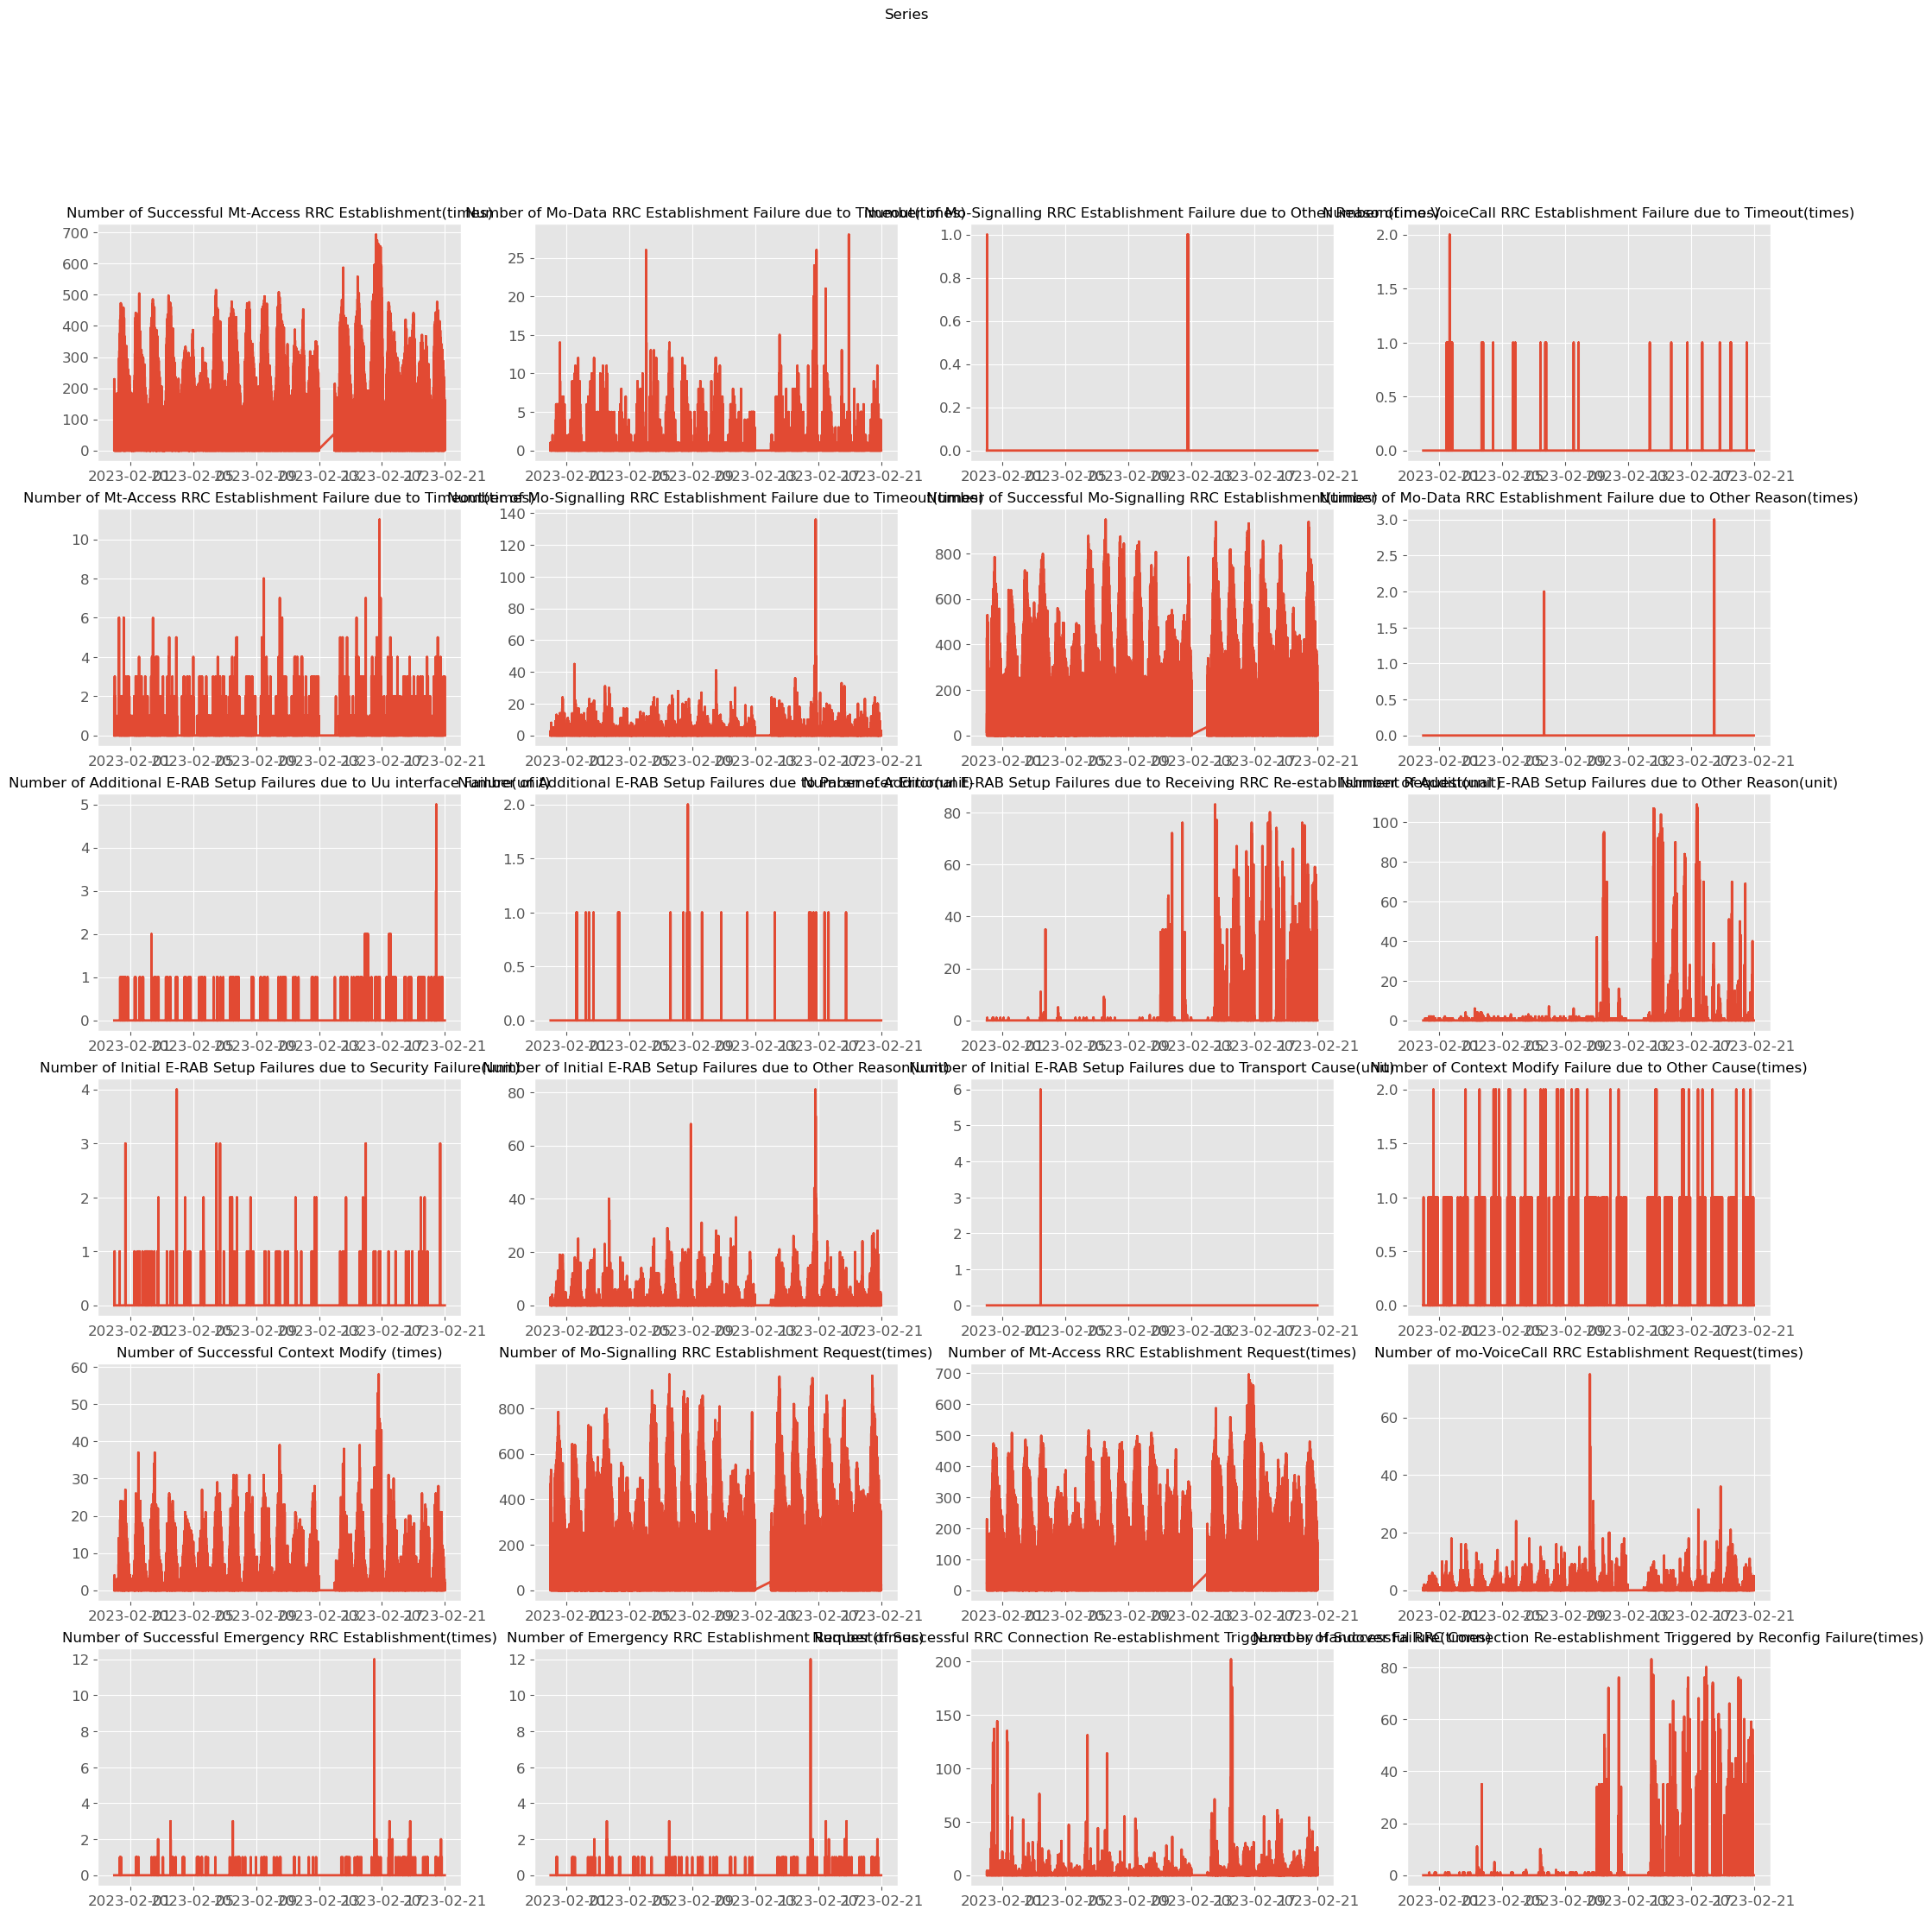

In [239]:
fig, axs = plt.subplots(6,4,figsize=(25,25))
fig.suptitle('Series')
for i in range(6):
    for j in range(4):
        if i*4+j+1>len(metrics_list_fin): # pass the others that we can't fill
            continue
        axs[i, j].plot(time_series_data['datetime'],time_series_data[metrics_list_fin[i*4+j]]) #time_series_data[i*4+j].values)
        axs[i, j].set_title(metrics_list_fin[i*4+j])
plt.show()

In [247]:
scaler = MinMaxScaler()
ts = time_series_data.copy()
ts2 = MinMaxScaler().fit_transform(ts[metrics_list_fin])

for i in range(len(metrics_list_fin)):
    ts[metrics_list_fin[i]] = ts2.T[i]

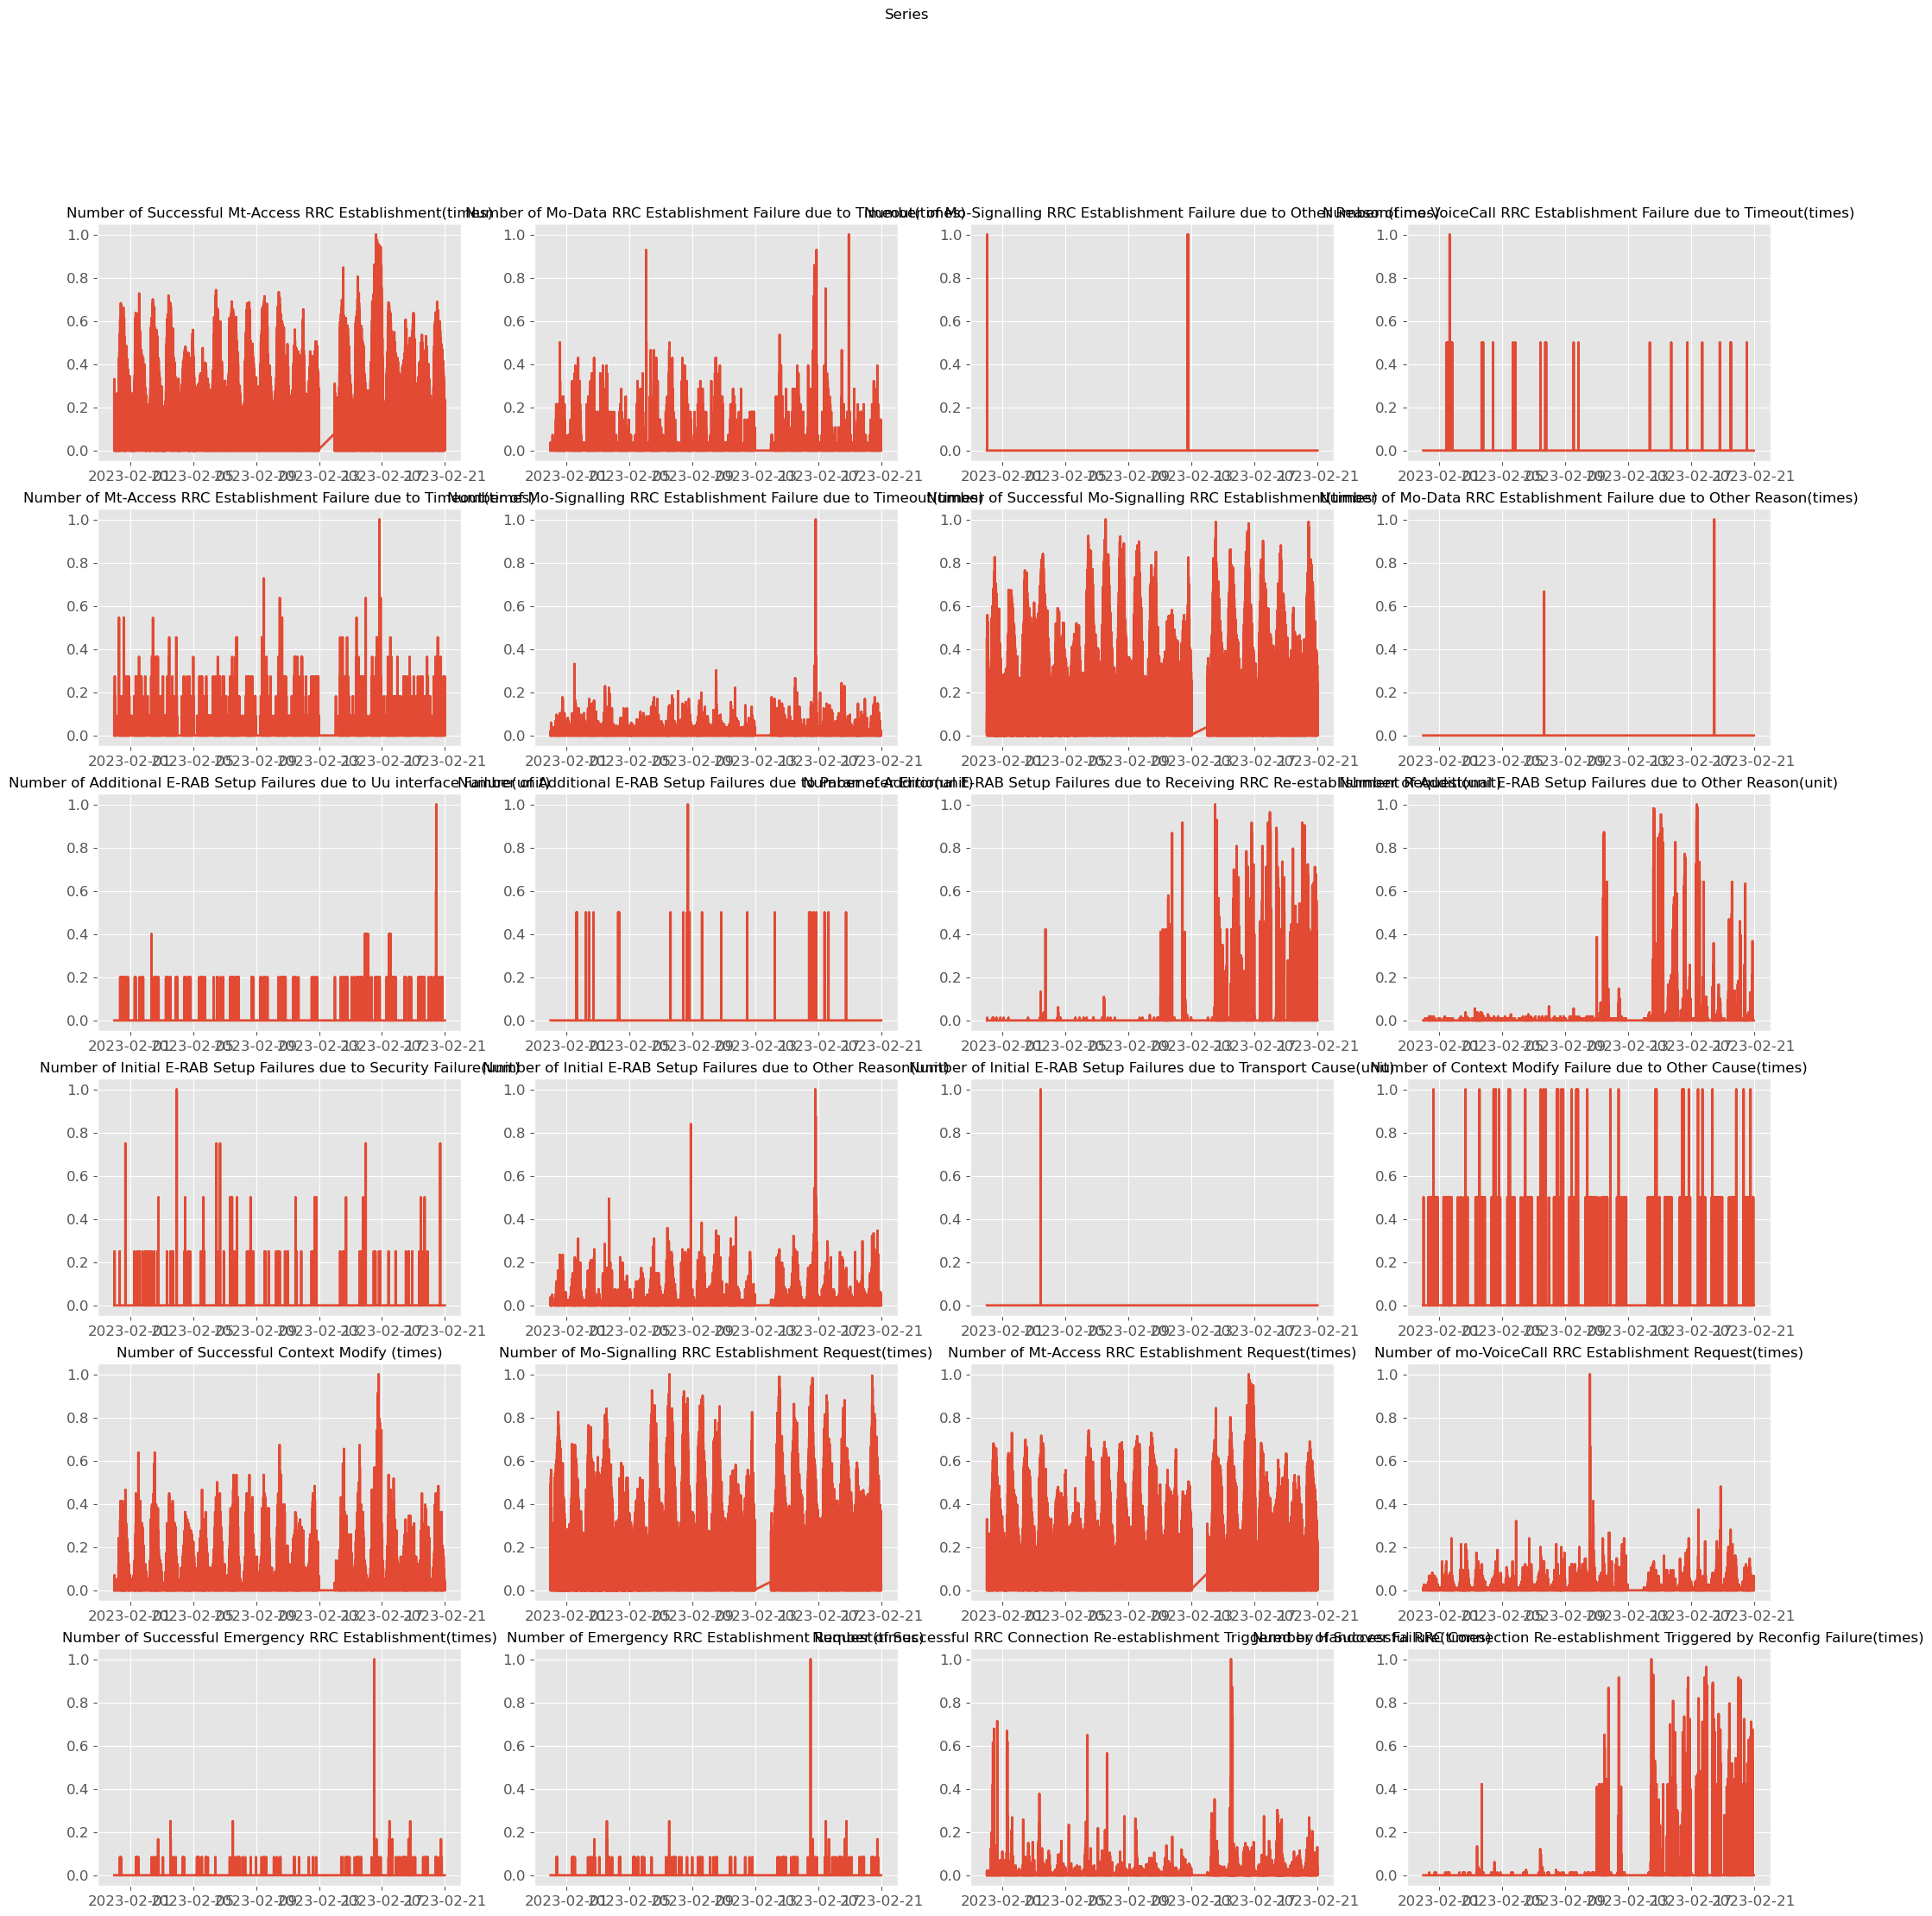

In [269]:
fig, axs = plt.subplots(6,4,figsize=(25,25))
fig.suptitle('Series')
for i in range(6):
    for j in range(4):
        if i*4+j+1>len(metrics_list_fin): # pass the others that we can't fill
            continue
        axs[i, j].plot(ts['datetime'],ts[metrics_list_fin[i*4+j]]) 
        axs[i, j].set_title(metrics_list_fin[i*4+j])
plt.show()

### Preprocessing

In [277]:
col = metrics_list_fin.copy()
col.append('datetime')
undersample_data = ts[col]
undersample_data = undersample_data.loc[np.linspace(undersample_data.index.min(),undersample_data.index.max(),1500).astype(int)]
undersample_data = undersample_data.reset_index().drop('index',axis=1)
undersample_data.head()

,Number of Successful Mt-Access RRC Establishment(times),Number of Mo-Data RRC Establishment Failure due to Timeout(times),Number of Mo-Signalling RRC Establishment Failure due to Other Reason(times),Number of mo-VoiceCall RRC Establishment Failure due to Timeout(times),Number of Mt-Access RRC Establishment Failure due to Timeout(times),Number of Mo-Signalling RRC Establishment Failure due to Timeout(times),Number of Successful Mo-Signalling RRC Establishment(times),Number of Mo-Data RRC Establishment Failure due to Other Reason(times),Number of Additional E-RAB Setup Failures due to Uu interface Failure(unit),Number of Additional E-RAB Setup Failures due to Parameter Error(unit),...,Number of reconfiguration complete Uu interface timeout caused by other dci0 lost(times),Number of reconfiguration complete Uu interface timeout caused by UL transmition not completely(times),Number of Cell Admission Failure due to Not Enough RRC Resource in ENB(times),Number of Cell Admission Failure due to Shut Down or Reset Cell(times),Number of Cell Admission Failure due to PHY Resource Allocated Failure(times),Number of Cell Admission Failure due to Other Reason(times),Cell Service Time(s),Maximum Number of RRC Connection User(unit),Number of E-RAB(QCI7) HO Incoming Admission Request(unit),datetime
0,0.036075,0.0,0.0,0.0,0.0,0.000000,0.096944,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.067669,0.004762,2023-01-31 00:00:00
1,0.024531,0.0,0.0,0.0,0.0,0.000000,0.015806,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.045113,0.000000,2023-01-31 00:15:00
2,0.002886,0.0,0.0,0.0,0.0,0.000000,0.013699,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.015038,0.000000,2023-01-31 00:30:00
3,0.021645,0.0,0.0,0.0,0.0,0.007353,0.003161,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.052632,0.000000,2023-01-31 00:45:00
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.002107,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.007519,0.000000,2023-01-31 01:15:00


Text(0, 0.5, 'Value')

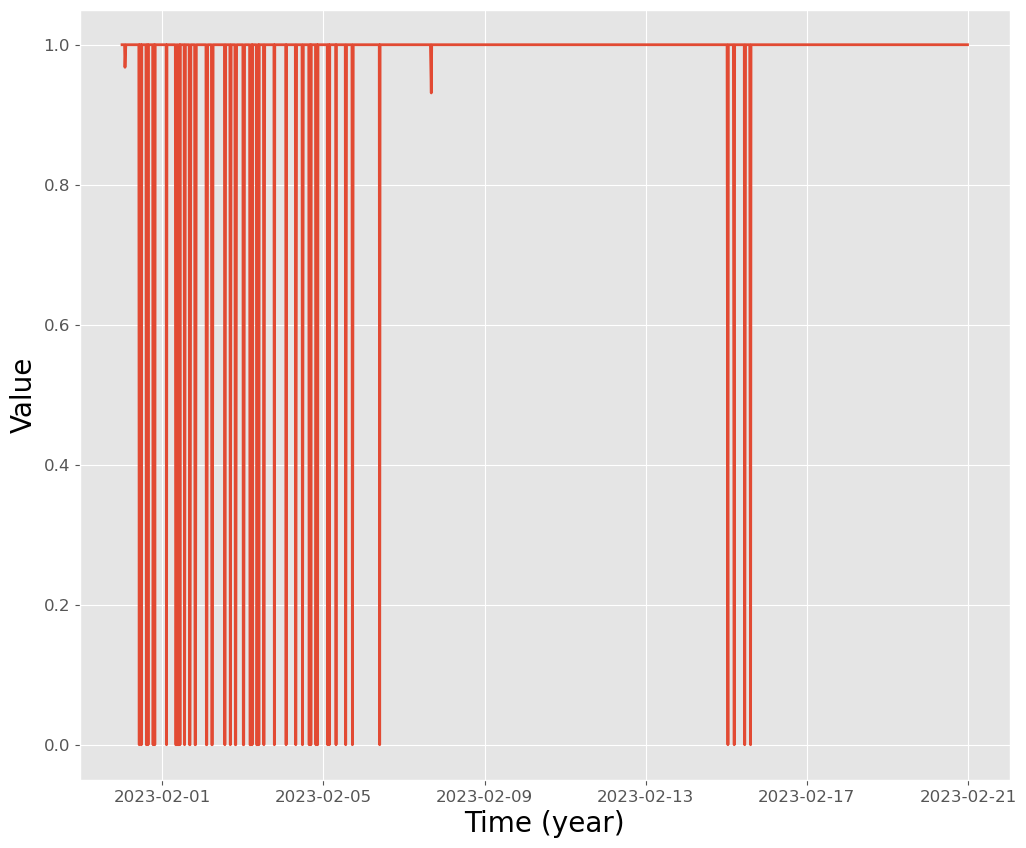

In [336]:
plt.plot(undersample_data.datetime,undersample_data['Cell Service Time(s)'])
plt.xlabel('Time (year)',fontsize=20)
plt.ylabel('Value',fontsize=20)

## Clustering

In [280]:

data_array = np.array(undersample_data.T.drop('datetime').values)

from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(data_array)
#cities_list = undersample_data.T.drop('datetime').index.tolist()

TimeSeriesKMeans(max_iter=10, metric='dtw')

In [281]:
y=model.predict(data_array)

C:\ProgramData\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 76 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [283]:
y

array([2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0], dtype=int64)

In [285]:
x = undersample_data.datetime

In [343]:
data = {'Metric': metrics_list_fin,
        'Class': y}

mm = pd.DataFrame(data)
mm.groupby(['Class']).count()
#sort_values(by=["Class"])[1:100]

#mm[mm['Class']==0]['Metric']

,Metric
Class,
0,70
1,1
2,5


In [200]:
k_dict = {'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2}
k_dict

{'1': 0, '2': 0, '3': 0, '4': 1, '5': 1, '6': 1, '7': 2, '8': 2, '9': 2}

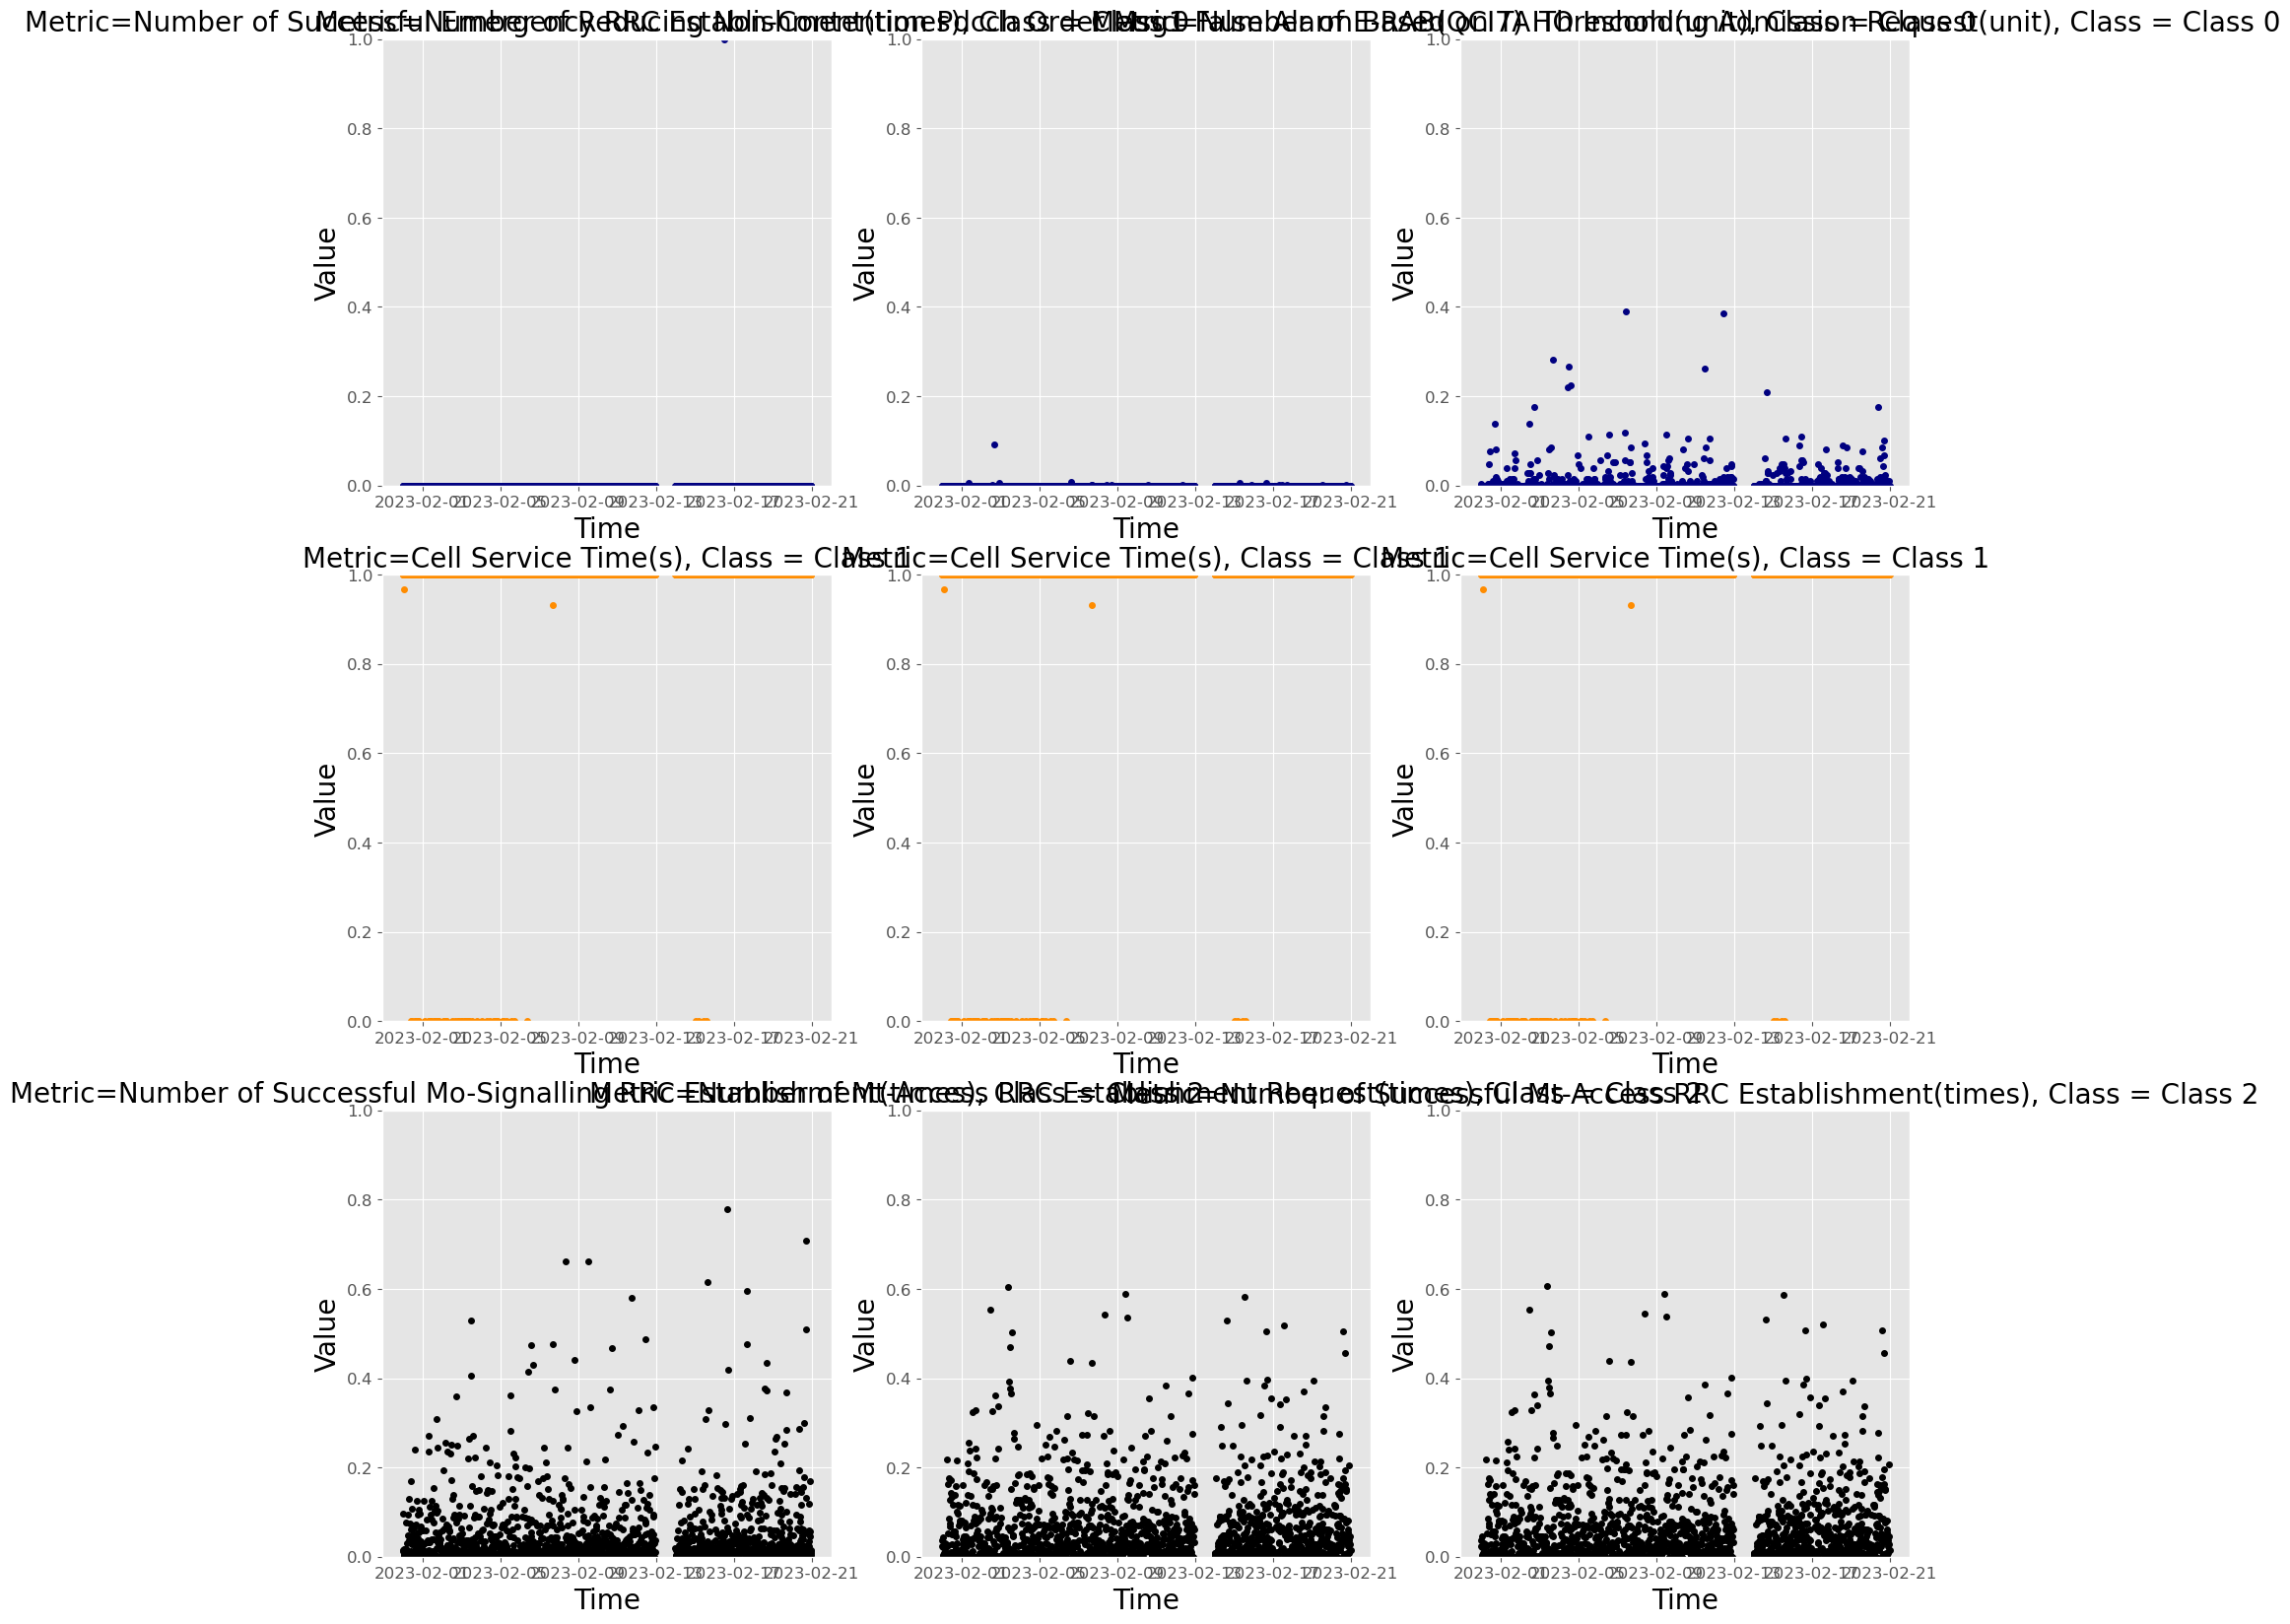

In [344]:
plt.figure(figsize=(20,20))
k_dict = {'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2}
colors = ['navy']*3+['darkorange']*3+['k']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3
for j in range(1,10):
    plt.subplot(3,3,j)
    k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    plt.plot(x,data_array[k],'.',color=colors[j-1])
    plt.ylabel('Value',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('Metric=%s, Class = %s'%(metrics_list_fin[k],Names[j-1]),fontsize=20)
    plt.ylim(data_array.min(),data_array.max())

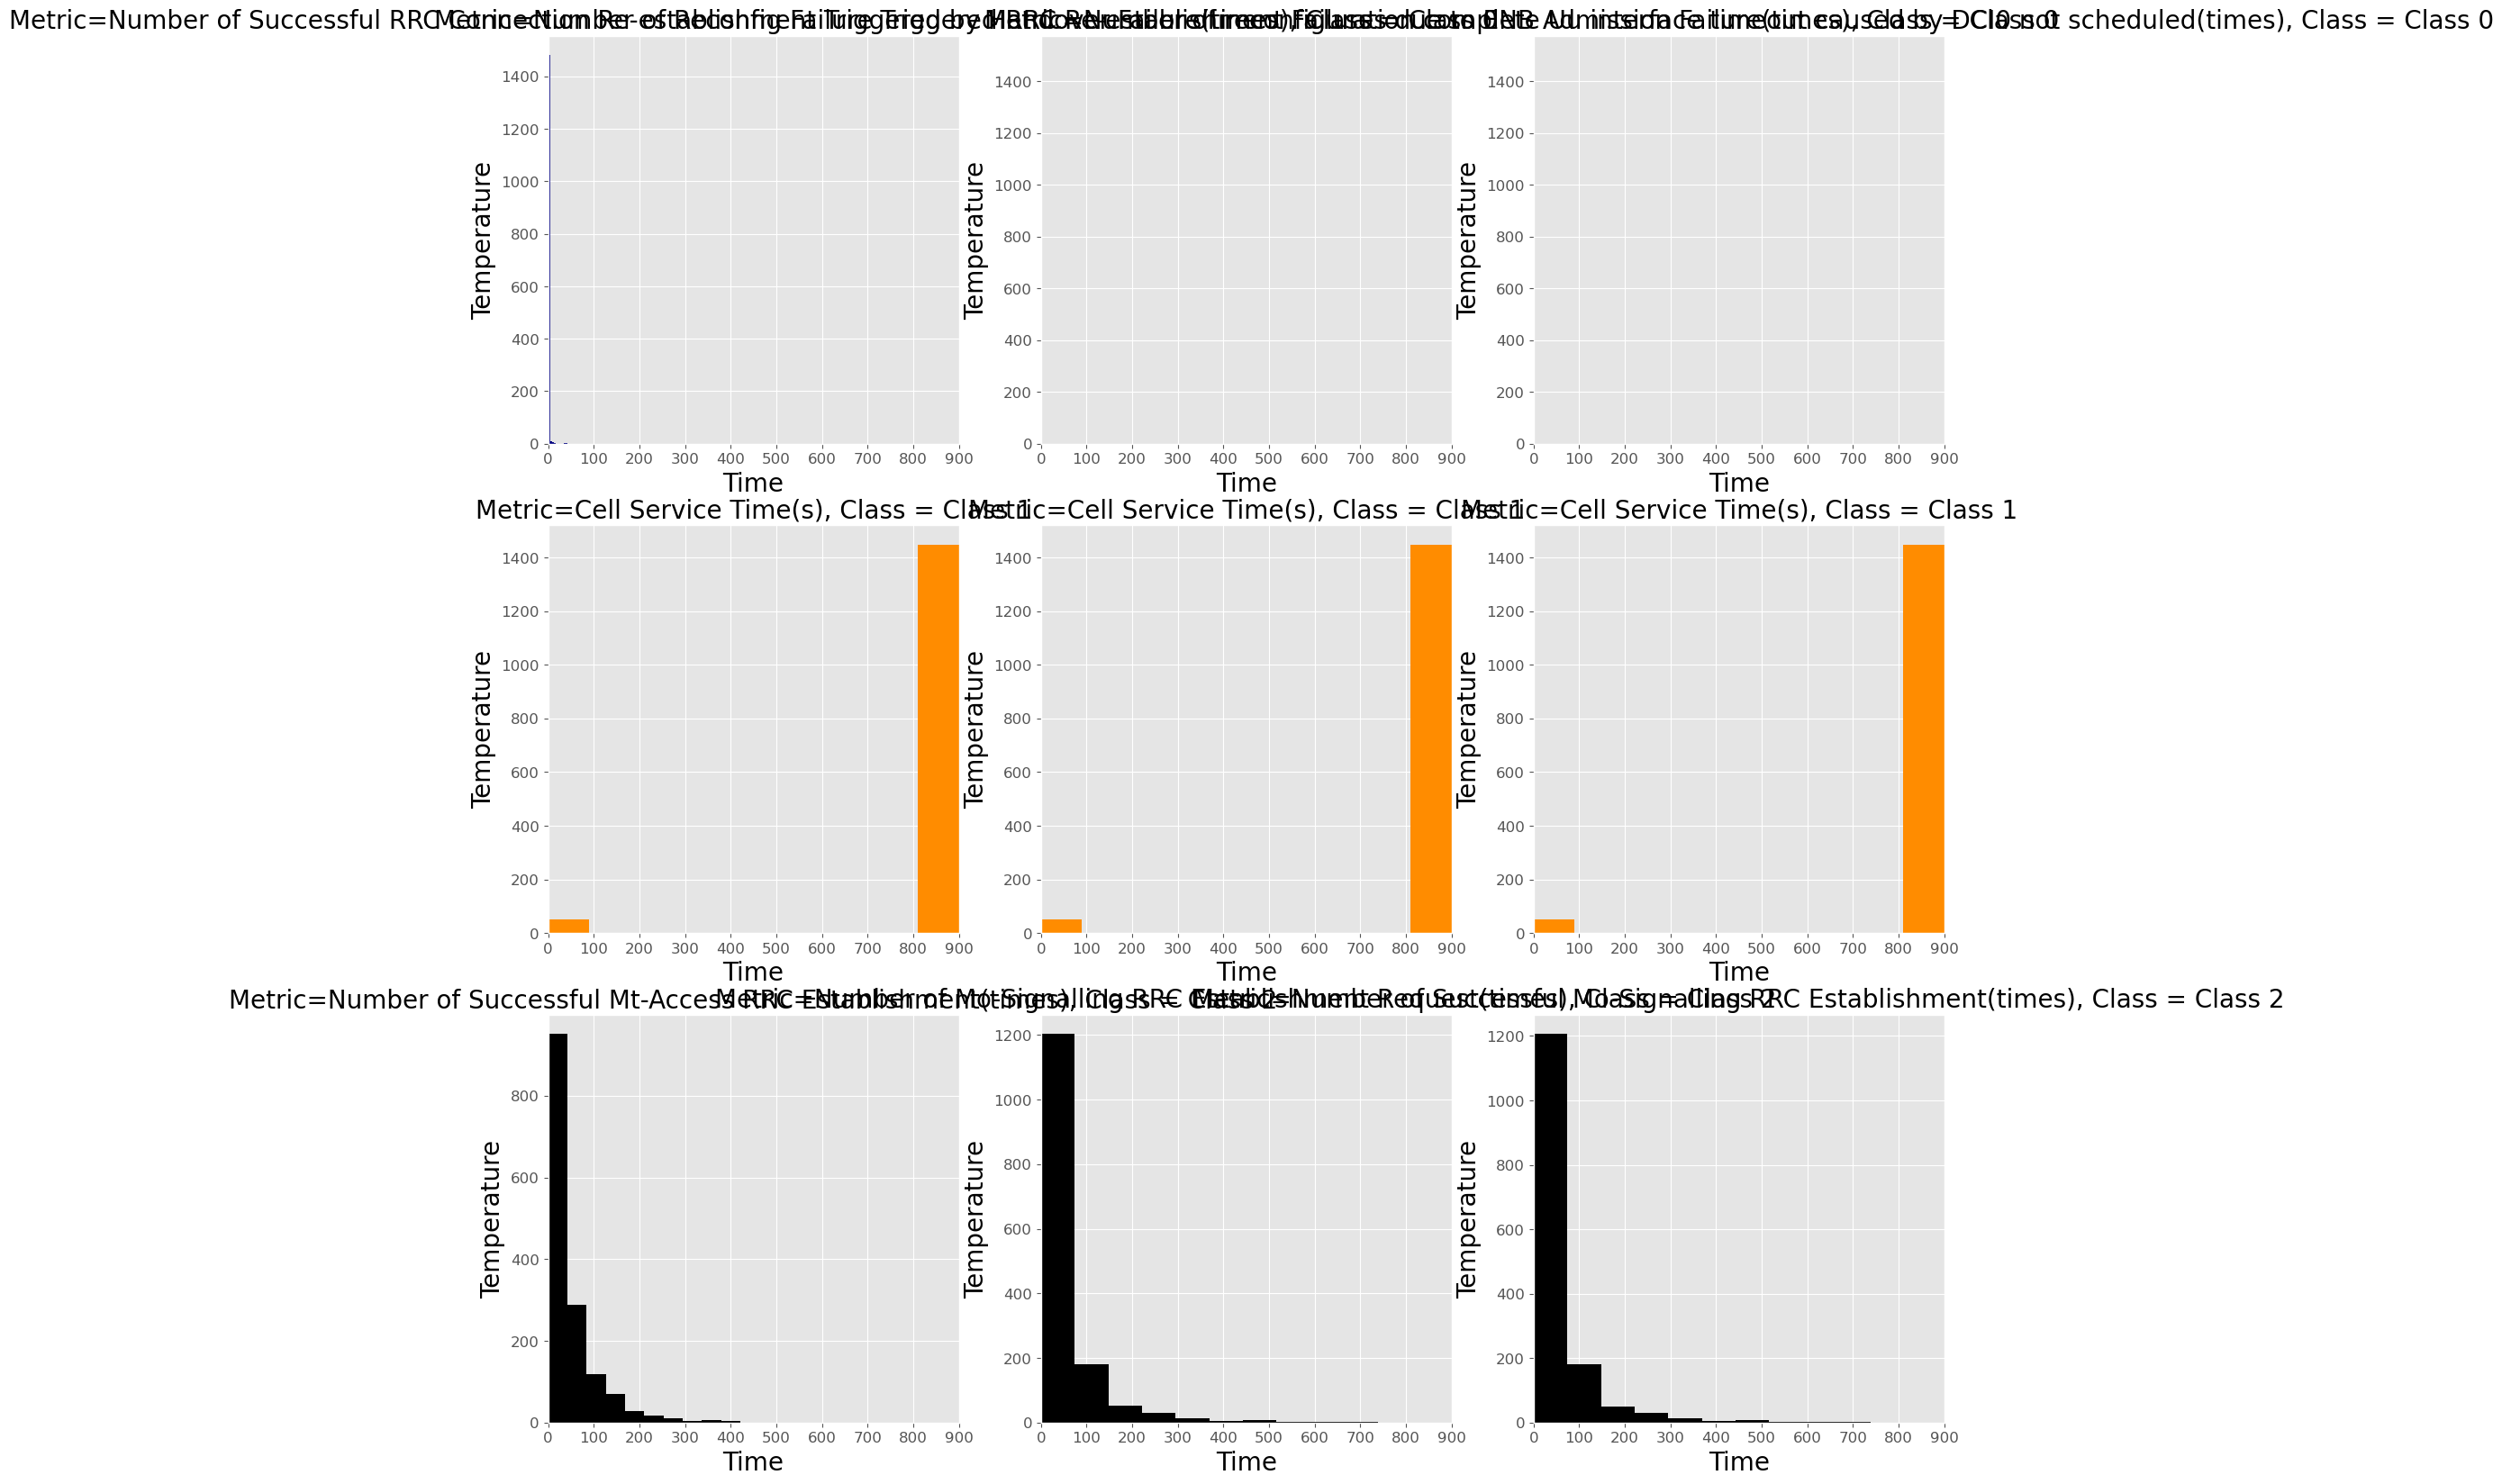

In [198]:
plt.figure(figsize=(20,20))
k_dict = {'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2}
colors = ['navy']*3+['darkorange']*3+['k']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3
for j in range(1,10):
    plt.subplot(3,3,j)
    k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    plt.hist(data_array[k],color=colors[j-1])
    plt.ylabel('Temperature',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('Metric=%s, Class = %s'%(metrics_list_fin[k],Names[j-1]),fontsize=20)
    plt.xlim(data_array.min(),data_array.max())